In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
#x1 = pd.read_csv("x_test.csv")
#x2 = pd.read_csv("y_test.csv")
#x3 = pd.read_csv("x_train.csv")
#x4 = pd.read_csv("y_train.csv")
x5 = pd.read_csv("smoking.csv")

In [4]:
#x1.drop(columns = "ID",inplace = True)
#x2.drop(columns = "ID",inplace = True)
#x3.drop(columns = "ID",inplace = True)
#x4.drop(columns = "ID",inplace = True)
x5.drop(columns = "ID",inplace = True)

In [5]:
#x1["smoking"] = x2
#x3["smoking"] = x4

In [6]:
#x1.shape

In [7]:
x5.dropna(inplace=True)

In [8]:
for i in x5:
    if x5[i].isnull().sum()>0:
        print(i,"-----------",x5[i].isnull().sum())

In [9]:
def remove_outliers(x,uf,lf):
    x = x.clip(lower = lf)
    x = x.clip(upper = uf)
    return x

In [10]:
for i in x5.select_dtypes([int,float]):

    q1=x5[i].quantile(0.25)
    q3=x5[i].quantile(0.75)
    iqr=q3-q1
    lf=q1-(1.5*iqr)
    uf=q3+(1.5*iqr)
    if lf>0 or uf>0:
        x5[i] = x5[i].clip(lf,uf)

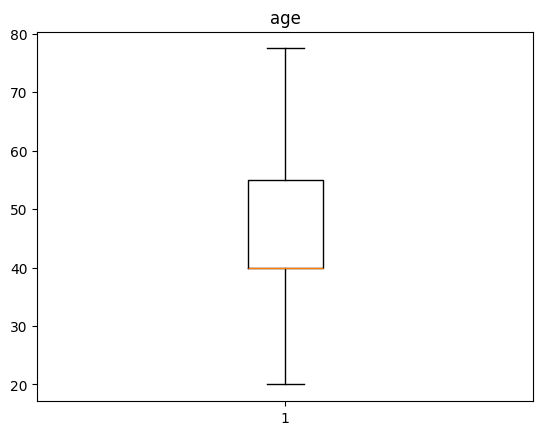

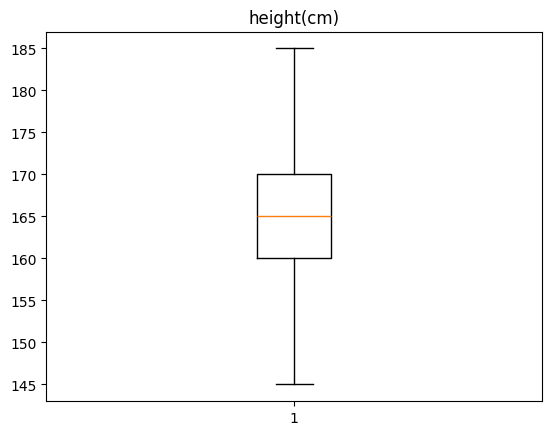

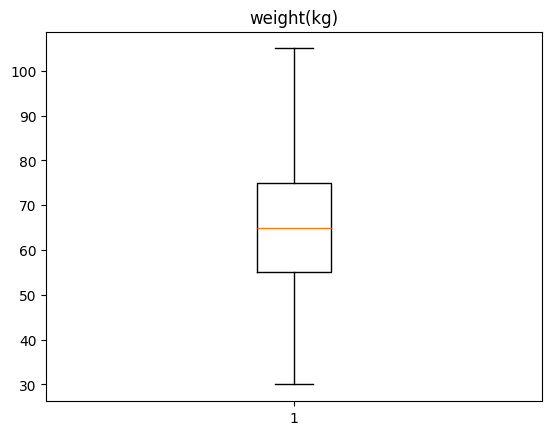

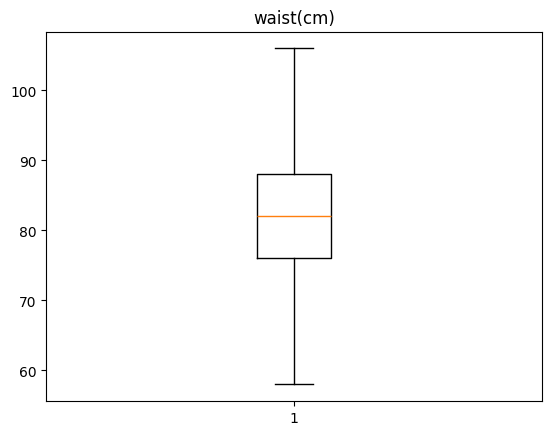

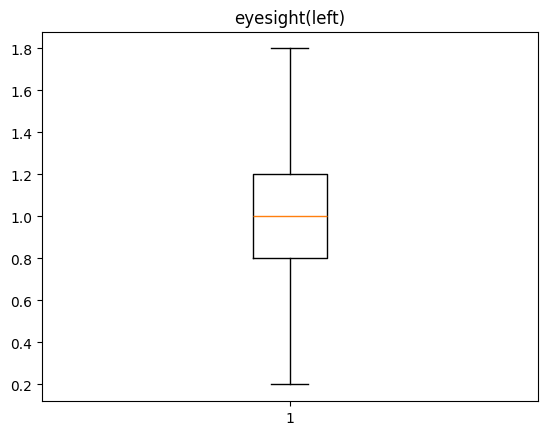

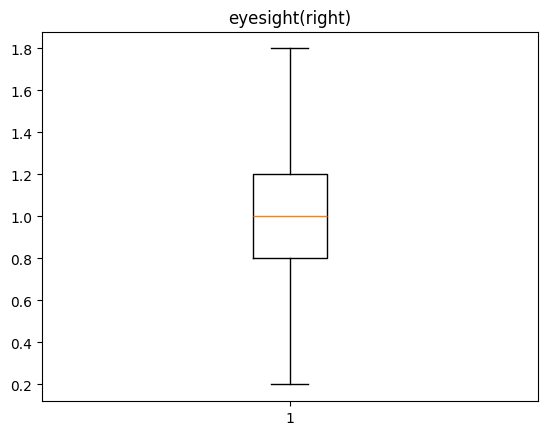

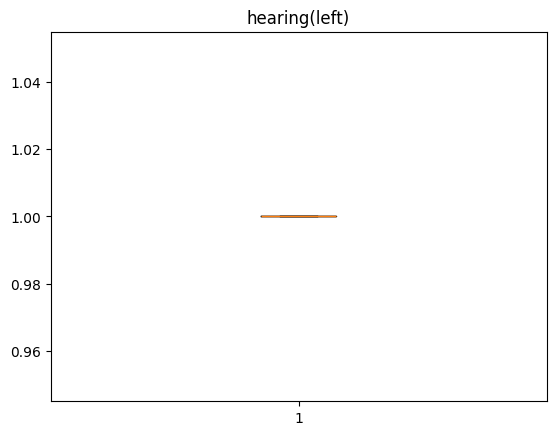

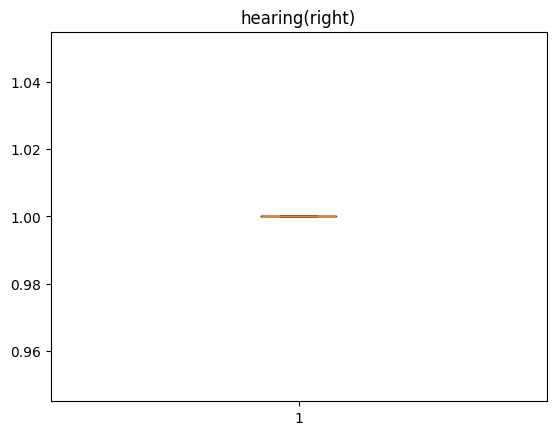

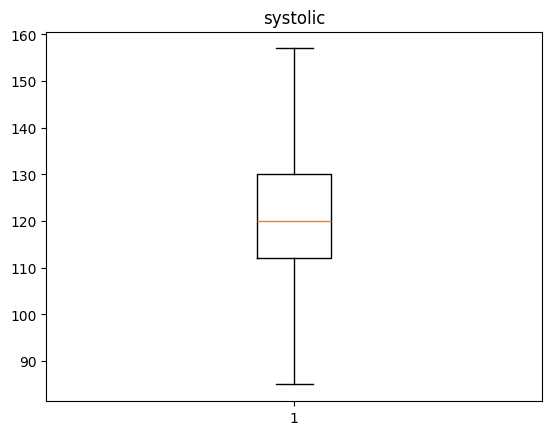

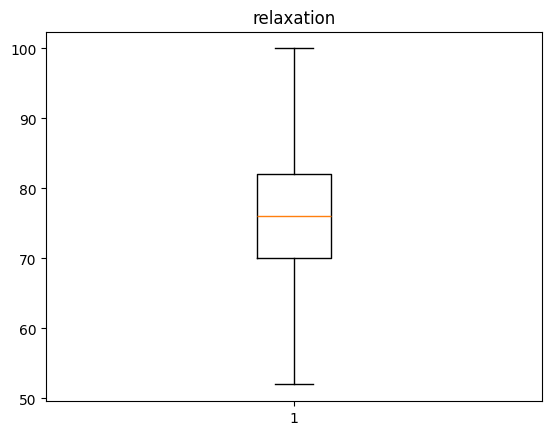

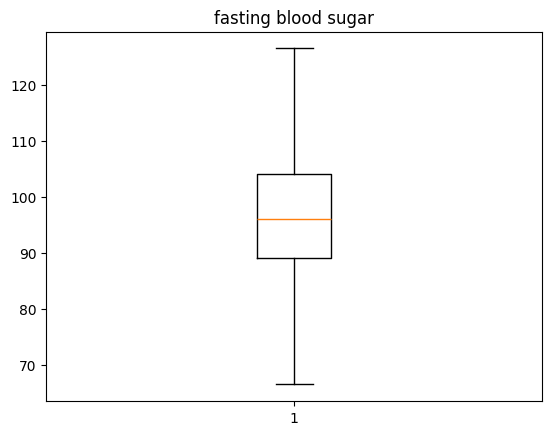

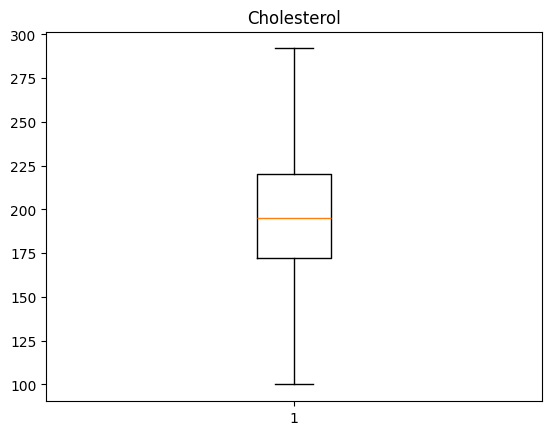

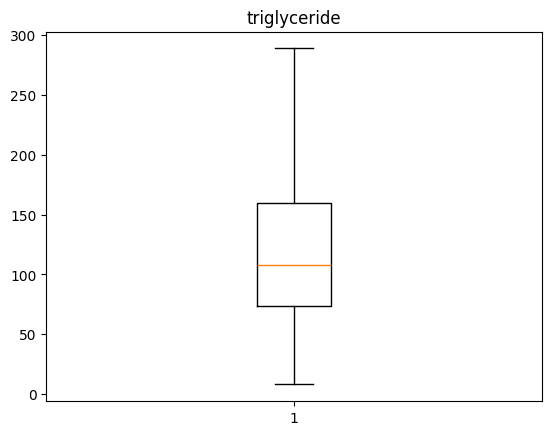

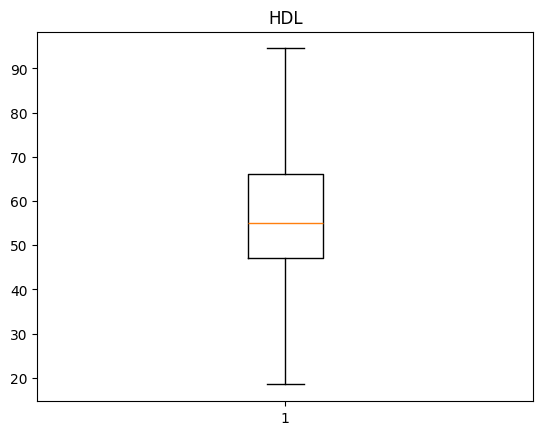

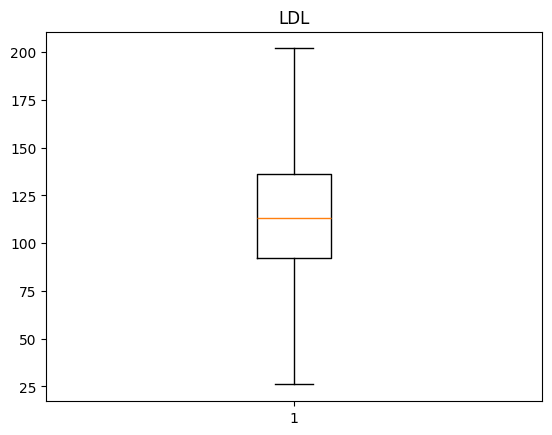

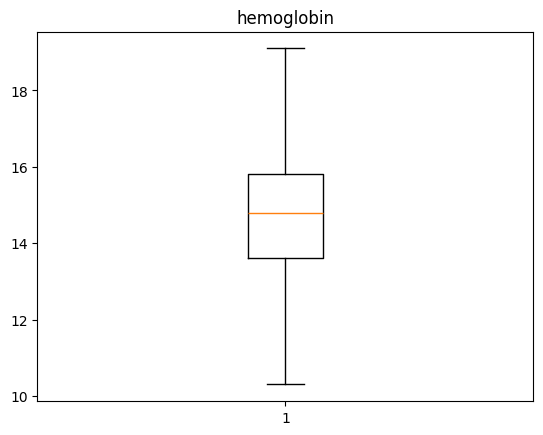

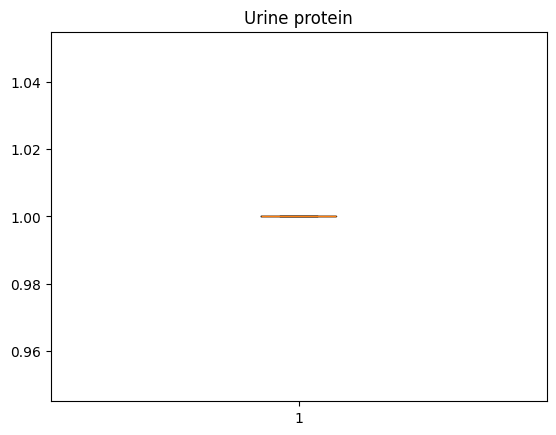

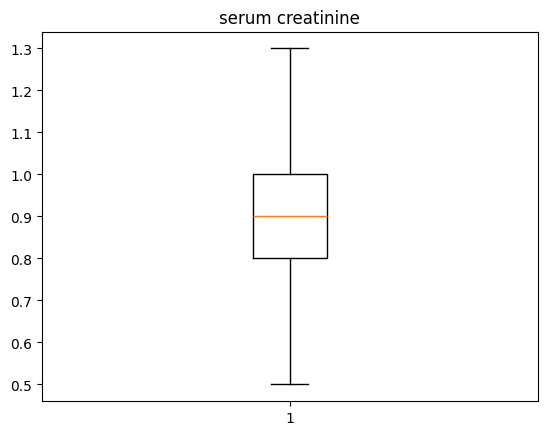

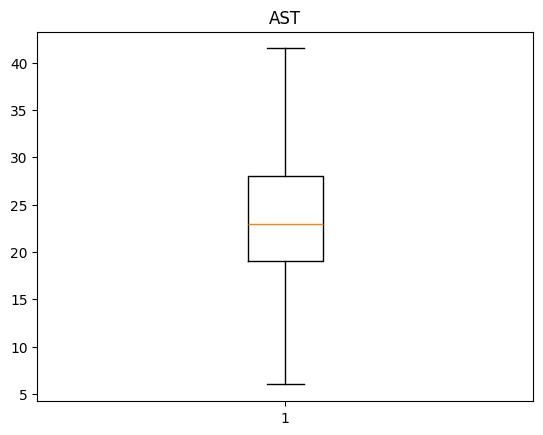

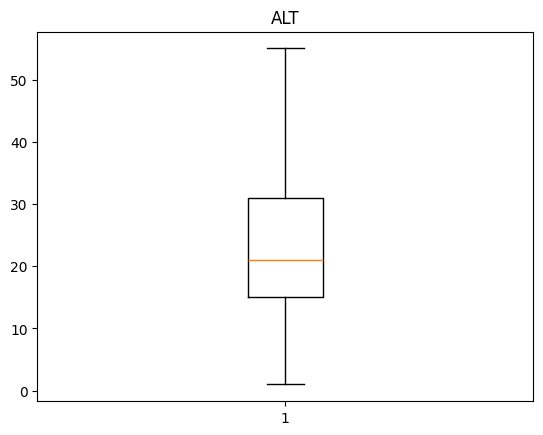

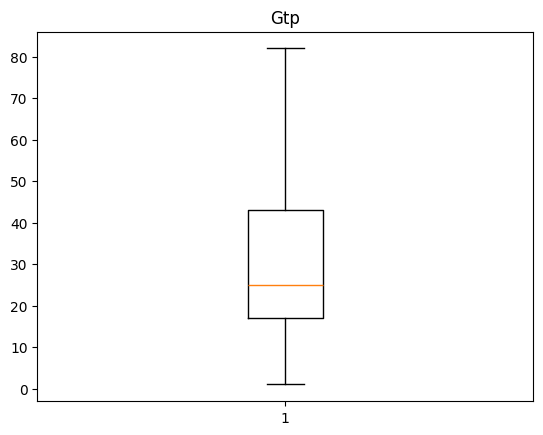

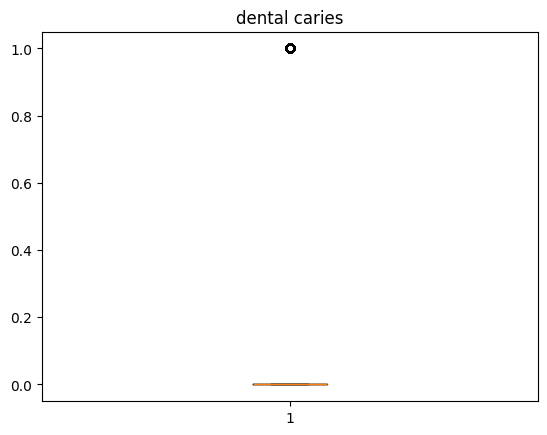

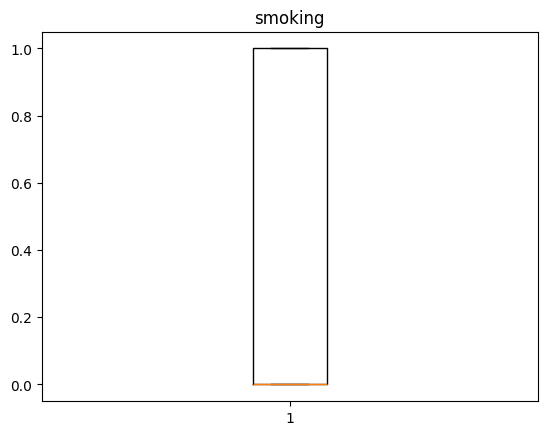

In [11]:
for i in x5.select_dtypes([int,float]):
    plt.boxplot(x5[i])
    plt.title(i)
    plt.show()

In [12]:
x5.select_dtypes(object).columns

Index(['gender', 'oral', 'tartar'], dtype='object')

In [13]:
x5.drop(columns = "oral", inplace = True)

In [14]:
x_dumm = pd.get_dummies(x5,columns=['gender', 'tartar'],drop_first = True)

In [15]:
X = x_dumm.drop(columns="smoking")
y = x_dumm["smoking"]

In [16]:
from  sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=55)

In [18]:
log = LogisticRegression()

In [19]:
log.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [20]:
train_score = log.score(X_train,y_train)
test_score = log.score(X_test,y_test)
print()
print("Train Score",train_score)
print("Test Score",test_score)


Train Score 0.7376832087625974
Test Score 0.7366909058263758


In [21]:
##############################################################################################################################################

In [22]:
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier(n_estimators =2000, random_state = 77)
rm.fit(X_train,y_train)
print("train" , rm.score(X_train,y_train))
print("test" , rm.score(X_test,y_test))

train 1.0
test 0.8426250112218332


In [23]:
from sklearn.model_selection import GridSearchCV
para = {"n_estimators": [100,200,250,300,350,400,450,500],
        "max_depth": [10,20,30,40,50,60],
        "min_samples_split": [40,50,60,70,80,90,100,110,120]}
rft = RandomForestClassifier(random_state = 77)
grid  = GridSearchCV(rft,param_grid = para, cv = 5, verbose = 1, n_jobs = -1 )
grid.fit(X_train,y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


KeyboardInterrupt: 

In [23]:
from sklearn.model_selection import GridSearchCV
para = {"n_estimators": [100,200,250,300,350,400,450,500,550],
        "criterion" : ["gini","entropy"],
        "max_depth": [10,20,30,40,50,60],
        "min_samples_split": [40,50,60,70,80,90,100,110,120],
        "min_samples_leaf": [10,20,30,40,50,60,70,80,90,100,110,120]}

rft = RandomForestClassifier(random_state = 77)
grid  = GridSearchCV(rft,param_grid = para, cv = 5, verbose = 1, n_jobs = -1 )
grid.fit(X_train,y_train)

Fitting 5 folds for each of 11664 candidates, totalling 58320 fits


KeyboardInterrupt: 